In [1]:
%load_ext autoreload

In [70]:
import pandas as pd
import numpy as np
import imageio
import os
import matplotlib.pyplot as plt
from glob import glob
import seaborn as sns


%matplotlib inline
%reload_ext autoreload
%autoreload 2


params = {"text.color" : "k",
          "ytick.color" : "k",
          "xtick.color" : "k",
          "axes.labelcolor" : "k",
          "axes.edgecolor" : "k",
          "font.weight" : "normal",
          "axes.labelsize" : 15,
          "ytick.labelsize" : 15,
          "xtick.labelsize" : 15,
          "axes.titlesize" : 21}
plt.rcParams.update(params)

In [28]:
def get_phase_counts(base_folder, n_phases=N_PHASES):
    phase_list = glob(os.path.join(base_folder, 'phase_annotations', '*.csv'))
#     print(phase_list)
    bin_counts = np.zeros(n_phases)
    
    for phase_folder in phase_list:
#         print(phase_folder)
        phase_data = pd.read_csv(phase_folder, header=None).values[:,1]
#         print(phase_data.shape)
        for phase in range(n_phases):
            bin_counts[phase] += np.sum(phase_data==phase)
            
    return bin_counts

# Original data

In [42]:
N_PHASES = 14
TRAINING_BASE_PATH = "/home/avemuri/DEV/Data/Endoviz2018/workflow_challenge/ORIGINAL/TrainingSet/"
VALIDATION_BASE_PATH = "/home/avemuri/DEV/Data/Endoviz2018/workflow_challenge/ORIGINAL/ValidationSet/"

In [43]:
ORIG_train_phase_count = get_phase_counts(TRAINING_BASE_PATH)
ORIG_valid_phase_count = get_phase_counts(VALIDATION_BASE_PATH)
print("Training data phase count: {0}".format(ORIG_train_phase_count))
print("Validation data phase count: {0}".format(ORIG_valid_phase_count))

Training data phase count: [ 202703.  389124.  133259.   42461.  914311.  165306.  229331.   67588.
 1151124. 1214520.  754373.  202731.  227454.  103437.]
Validation data phase count: [ 34595.  49393.  18118.  19883. 130184.  29279.  60979.  17005. 212256.
 191639.  52008.  42902.  29318.  59572.]


# Cleaned data

In [44]:
N_PHASES = 14
TRAINING_BASE_PATH = "/home/avemuri/DEV/Data/Endoviz2018/workflow_challenge/CLEANED/TrainingSet/"
VALIDATION_BASE_PATH = "/home/avemuri/DEV/Data/Endoviz2018/workflow_challenge/CLEANED/ValidationSet/"

In [45]:
CLEANED_train_phase_count = get_phase_counts(TRAINING_BASE_PATH)
CLEANED_valid_phase_count = get_phase_counts(VALIDATION_BASE_PATH)
print("Cleaned training data phase count: {0}".format(CLEANED_train_phase_count))
print("Cleaned validation data phase count: {0}".format(CLEANED_valid_phase_count))

Cleaned training data phase count: [ 184369.  384661.  133252.   42460.  900237.  163147.  229309.   67140.
 1137948.    1287.  717276.  148130.  206519.  101968.]
Cleaned validation data phase count: [3.36720e+04 4.86790e+04 1.81180e+04 1.98830e+04 1.27868e+05 2.92790e+04
 6.09790e+04 1.70050e+04 2.08068e+05 2.60000e+01 5.01450e+04 3.49180e+04
 2.91020e+04 5.79710e+04]


# Compressed data

In [46]:
N_PHASES = 14
TRAINING_BASE_PATH = "/home/avemuri/DEV/Data/Endoviz2018/workflow_challenge/COMPRESSED_0_05/TrainingSet/"
VALIDATION_BASE_PATH = "/home/avemuri/DEV/Data/Endoviz2018/workflow_challenge/COMPRESSED_0_05/ValidationSet/"

In [47]:
COMPRESSED_train_phase_count = get_phase_counts(TRAINING_BASE_PATH)
COMPRESSED_valid_phase_count = get_phase_counts(VALIDATION_BASE_PATH)
print("Compressed training data phase count: {0}".format(COMPRESSED_train_phase_count))
print("Compressed validation data phase count: {0}".format(COMPRESSED_valid_phase_count))

Compressed training data phase count: [ 77608.  77383.  38987.  29198. 164007.  56978.  45613.  41089. 125697.
   1081.  82222.  56936.  67912.  12649.]
Compressed validation data phase count: [1.9251e+04 1.8373e+04 3.7790e+03 2.9600e+03 3.0826e+04 6.7390e+03
 9.6990e+03 5.9200e+03 2.9051e+04 2.6000e+01 8.6740e+03 8.5710e+03
 8.6740e+03 9.4930e+03]


# Plot

In [79]:
FONTSIZE_TITLE = 20
FONTSIZE = 16
figsize = (10,5)

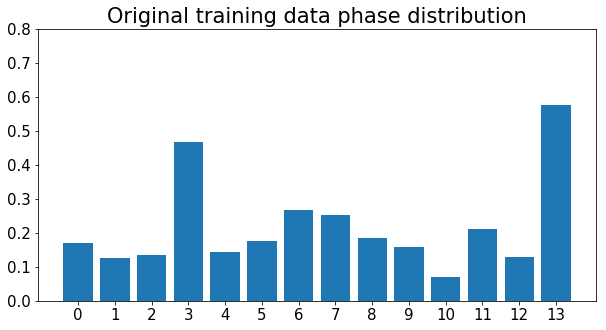

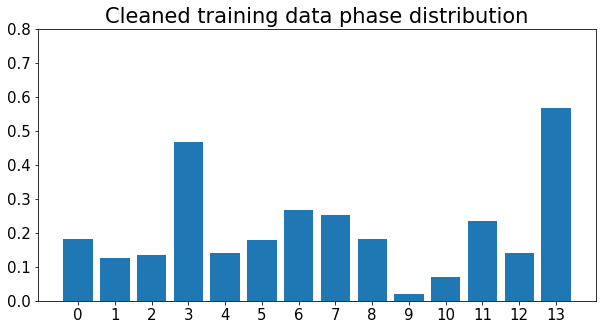

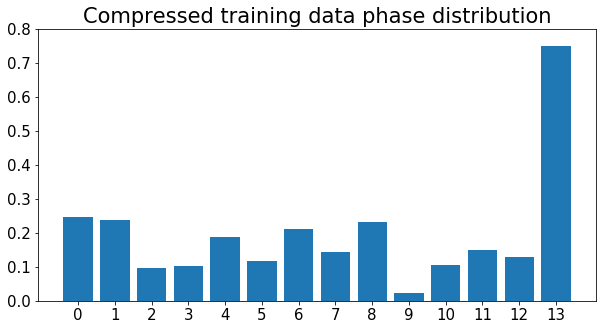

In [78]:
ORIG_ratio = ORIG_valid_phase_count/(ORIG_train_phase_count+1)
CLEANED_ratio = CLEANED_valid_phase_count/(CLEANED_train_phase_count+1)
COMPRESS_ratio = COMPRESSED_valid_phase_count/(COMPRESSED_train_phase_count+1)

# ORIGINAL
plt.figure(figsize=figsize)
plt.bar(list(range(N_PHASES)), ORIG_ratio)
plt.title("Original training data phase distribution")
_ = plt.xticks(list(range(N_PHASES)), list(range(N_PHASES)))
_ = plt.ylim((0,0.8))

# CLEANED
plt.figure(figsize=figsize)
plt.bar(list(range(N_PHASES)), CLEANED_ratio)
plt.title("Cleaned training data phase distribution")
_ = plt.xticks(list(range(N_PHASES)), list(range(N_PHASES)))
_ = plt.ylim((0,0.8))

# COMPRESSED
plt.figure(figsize=figsize)
plt.bar(list(range(N_PHASES)), COMPRESS_ratio)
plt.title("Compressed training data phase distribution")
_ = plt.xticks(list(range(N_PHASES)), list(range(N_PHASES)))
_ = plt.ylim((0,0.8))

In [ ]:
ORIG_ratio = ORIG_valid_phase_count/(ORIG_train_phase_count+1)
CLEANED_ratio = CLEANED_valid_phase_count/(CLEANED_train_phase_count+1)
COMPRESS_ratio = COMPRESSED_valid_phase_count/(COMPRESSED_train_phase_count+1)

# ORIGINAL
plt.figure(figsize=figsize)
plt.bar(list(range(N_PHASES)), ORIG_ratio)
plt.title("Original training data phase distribution")
_ = plt.xticks(list(range(N_PHASES)), list(range(N_PHASES)))
_ = plt.ylim((0,0.8))

# CLEANED
plt.figure(figsize=figsize)
plt.bar(list(range(N_PHASES)), CLEANED_ratio)
plt.title("Cleaned training data phase distribution")
_ = plt.xticks(list(range(N_PHASES)), list(range(N_PHASES)))
_ = plt.ylim((0,0.8))

# COMPRESSED
plt.figure(figsize=figsize)
plt.bar(list(range(N_PHASES)), COMPRESS_ratio)
plt.title("Compressed training data phase distribution")
_ = plt.xticks(list(range(N_PHASES)), list(range(N_PHASES)))
_ = plt.ylim((0,0.8))

In [ ]:
# ORIGINAL
plt.figure(figsize=figsize)
plt.bar(list(range(N_PHASES)), ORIG_train_phase_count/(np.sum(ORIG_train_phase_count)))
plt.title("Original training data phase distribution", fontsize=FONTSIZE_TITLE)
_ = plt.xticks(list(range(N_PHASES)), list(range(N_PHASES)))

plt.figure(figsize=figsize)
plt.bar(list(range(N_PHASES)), ORIG_valid_phase_count/(np.sum(ORIG_valid_phase_count)+1))
plt.title("Original validation data phase distribution", fontsize=FONTSIZE_TITLE)
_ = plt.xticks(list(range(N_PHASES)), list(range(N_PHASES)), fontsize=FONTSIZE)


# CLEANED
plt.figure(figsize=figsize)
plt.bar(list(range(N_PHASES)), CLEANED_train_phase_count/(np.sum(CLEANED_train_phase_count)))
plt.title("Compressed training data phase distribution", fontsize=FONTSIZE_TITLE)
_ = plt.xticks(list(range(N_PHASES)), list(range(N_PHASES)), fontsize=FONTSIZE)

plt.figure(figsize=figsize)
plt.bar(list(range(N_PHASES)), CLEANED_valid_phase_count/(np.sum(CLEANED_valid_phase_count)+1))
plt.title("Compressed validation data phase distribution", fontsize=FONTSIZE_TITLE)
_ = plt.xticks(list(range(N_PHASES)), list(range(N_PHASES)), fontsize=FONTSIZE)


# COMPRESSED
plt.figure(figsize=figsize)
plt.bar(list(range(N_PHASES)), COMPRESSED_train_phase_count/(np.sum(COMPRESSED_train_phase_count)))
plt.title("Compressed training data phase distribution", fontsize=FONTSIZE_TITLE)
_ = plt.xticks(list(range(N_PHASES)), list(range(N_PHASES)), fontsize=FONTSIZE)

plt.figure(figsize=figsize)
plt.bar(list(range(N_PHASES)), COMPRESSED_valid_phase_count/(np.sum(COMPRESSED_valid_phase_count)+1))
plt.title("Compressed validation data phase distribution", fontsize=FONTSIZE_TITLE)
_ = plt.xticks(list(range(N_PHASES)), list(range(N_PHASES)), fontsize=FONTSIZE)

In [95]:
def concatenate_phase_data(phase_path):
    
    phase_list = glob(os.path.join(phase_path, '*.csv'))
    
    phase_data_all = np.empty([2,1])
    for loc in phase_list:
        _, file_name = os.path.split(loc)
        file_name, _ = os.path.splitext(file_name)

        phase_data = list(pd.read_csv(loc, header=None).values[:,1])
        file_name_list = [file_name] * len(phase_data)

        phase_data_all = np.hstack((phase_data_all, np.array((file_name_list, phase_data))))

    phase_data_all = np.squeeze(phase_data_all[:,1:])
    return phase_data_all

(2, 3241968)
['0' '0' '0' ... '12' '12' '12']
['Prokto1_cleaned' 'Prokto1_cleaned' 'Prokto1_cleaned' ...
 'Sigma5_cleaned' 'Sigma5_cleaned' 'Sigma5_cleaned']
['0' '1' '10' '11' '12' '13' '2' '3' '4' '5' '6' '7' '8' '9']
14
0 phase: 137873

1 phase: 286230

10 phase: 399036

11 phase: 103071

12 phase: 164639

13 phase: 101986

2 phase: 106394

3 phase: 44970

4 phase: 568241

5 phase: 161283

6 phase: 212023

7 phase: 64819

8 phase: 890162

9 phase: 1241



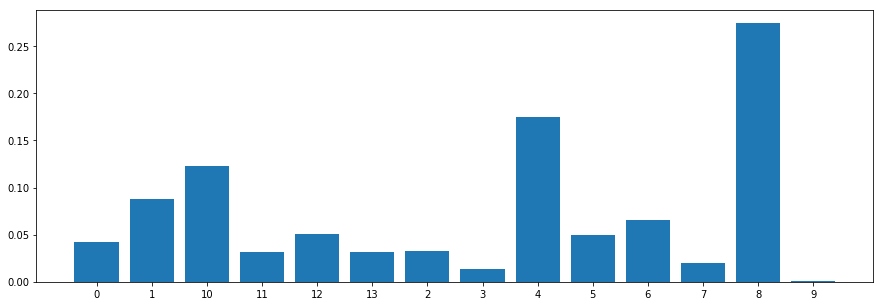

In [147]:
PHASE_PATH = "F:\data\Endoviz2018\Workflow_Challenge\TrainingSet-1\cleaned\phase_annotations"
phase_data_all = concatenate_phase_data(PHASE_PATH)
print(phase_data_all.shape)
print(phase_data_all[1])
print(phase_data_all[0])

phases = np.unique(phase_data_all[1])
print(phases)
print(len(phases))


phase_locs = []
phase_counts = []
count = 0
for phase in phases:
    phase_locs.append(phase_data_all[1]==phase)
    phase_counts.append(np.sum(phase_locs[count]))
    print("{0} phase: {1}\n".format(phases[count], phase_counts[count]))
    count += 1

plt.figure(figsize=(15,5))
plt.bar(phases, phase_counts/np.sum(phase_counts))
phase_counts_cleaned = phase_counts

(2, 4193067)
['0' '0' '0' ... '12' '12' '12']
['Prokto1' 'Prokto1' 'Prokto1' ... 'Sigma5' 'Sigma5' 'Sigma5']
['0' '1' '10' '11' '12' '13' '2' '3' '4' '5' '6' '7' '8' '9']
14
0 phase: 146401

1 phase: 290607

10 phase: 420656

11 phase: 126761

12 phase: 181751

13 phase: 104005

2 phase: 106398

3 phase: 44971

4 phase: 580233

5 phase: 163434

6 phase: 212045

7 phase: 64828

8 phase: 900880

9 phase: 850097



<BarContainer object of 14 artists>

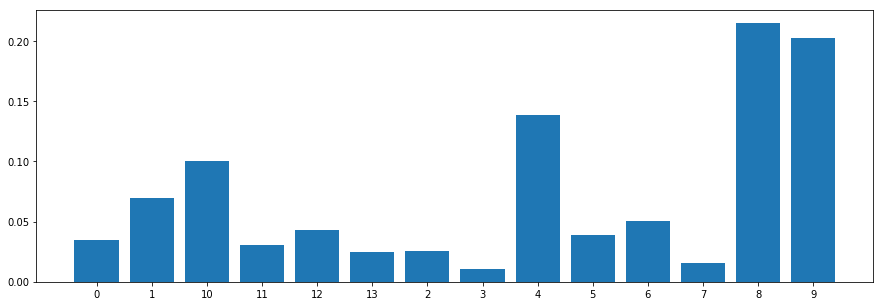

In [148]:
PHASE_PATH = "F:\data\Endoviz2018\Workflow_Challenge\TrainingSet-1\phase_annotations"
phase_data_all = concatenate_phase_data(PHASE_PATH)
print(phase_data_all.shape)
print(phase_data_all[1])
print(phase_data_all[0])

phases = np.unique(phase_data_all[1])
print(phases)
print(len(phases))


phase_locs = []
phase_counts = []
count = 0
for phase in phases:
    phase_locs.append(phase_data_all[1]==phase)
    phase_counts.append(np.sum(phase_locs[count]))
    print("{0} phase: {1}\n".format(phases[count], phase_counts[count]))
    count += 1

plt.figure(figsize=(15,5))
plt.bar(phases, phase_counts/np.sum(phase_counts))

<BarContainer object of 14 artists>

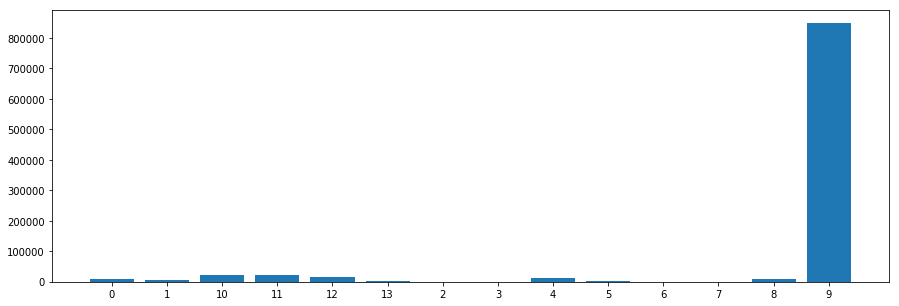

In [146]:
diff = np.array(phase_counts)-np.array(phase_counts_cleaned)
plt.figure(figsize=(15,5))
plt.bar(phases, diff)

In [118]:
from sklearn.model_selection import train_test_split

In [ ]:
def compress_phase_data(phase_path):
    
    phase_list = glob(os.path.join(phase_path, '*.csv'))
    
    for loc in phase_list:
        _, file_name = os.path.split(loc)
        file_name, _ = os.path.splitext(file_name)

        phase_data = list(pd.read_csv(loc, header=None).values[:,1])
        file_name_list = [file_name] * len(phase_data)

        phase_data_all = np.hstack((phase_data_all, np.array((file_name_list, phase_data))))

    phase_data_all = np.squeeze(phase_data_all[:,1:])
    return phase_data_all

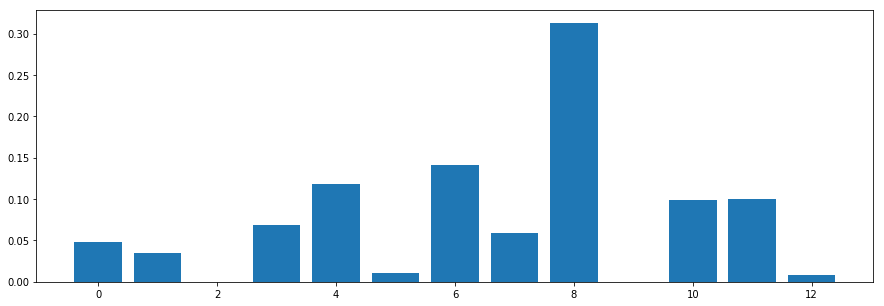

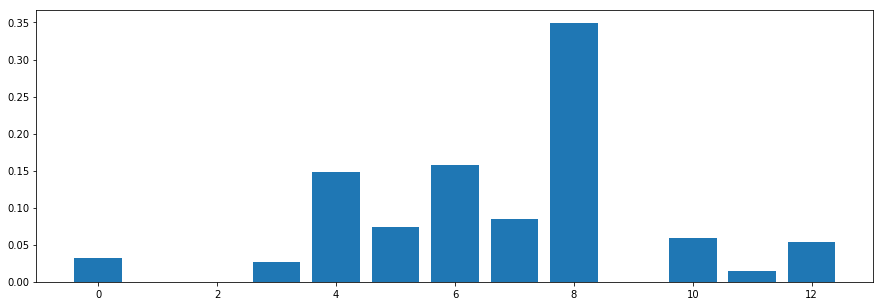

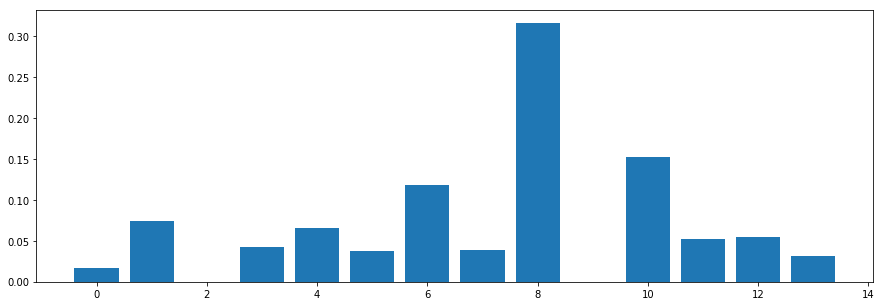

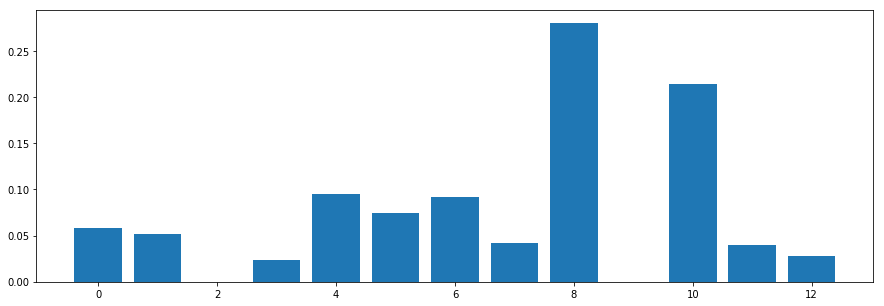

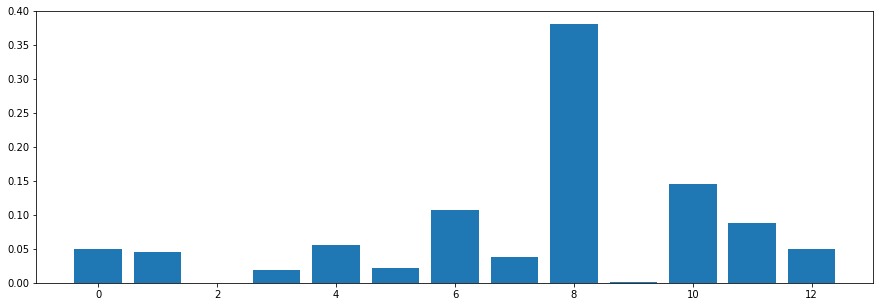

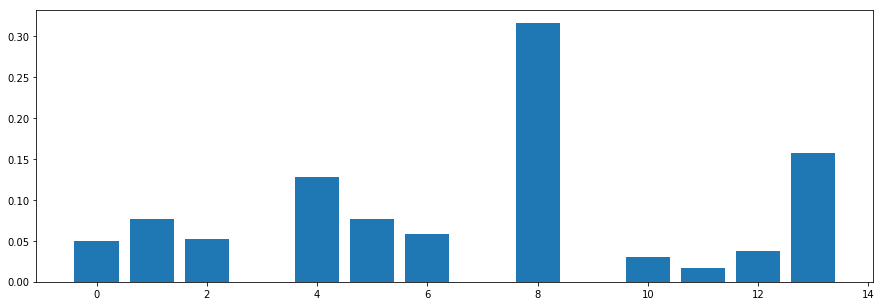

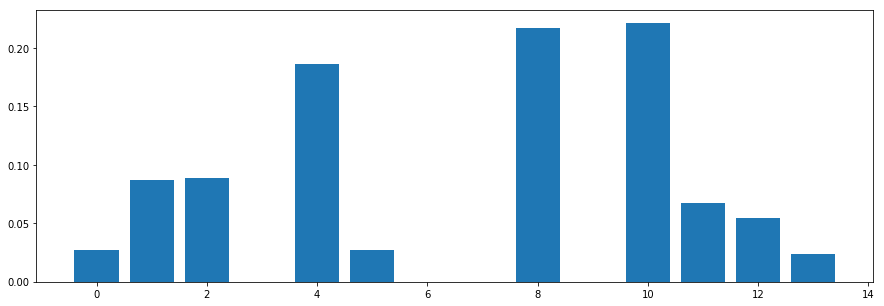

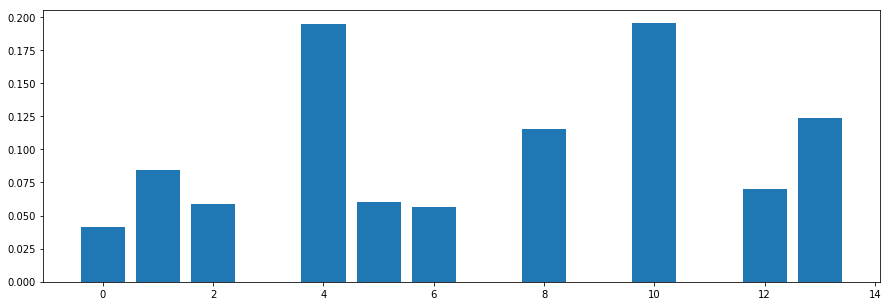

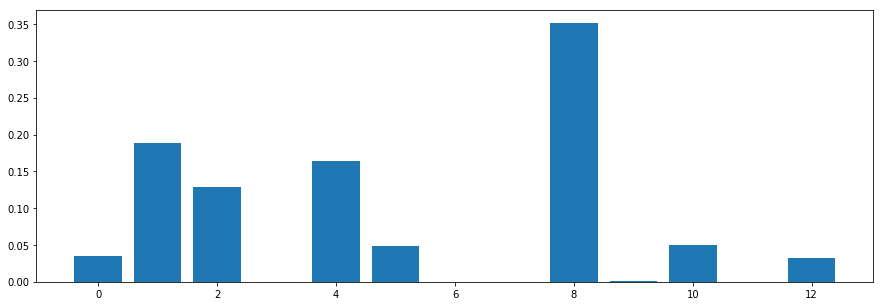

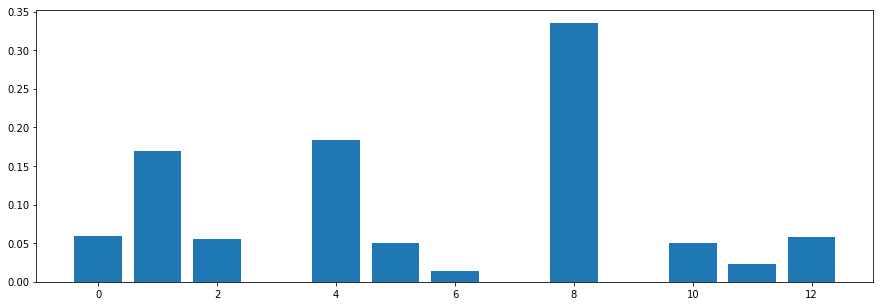

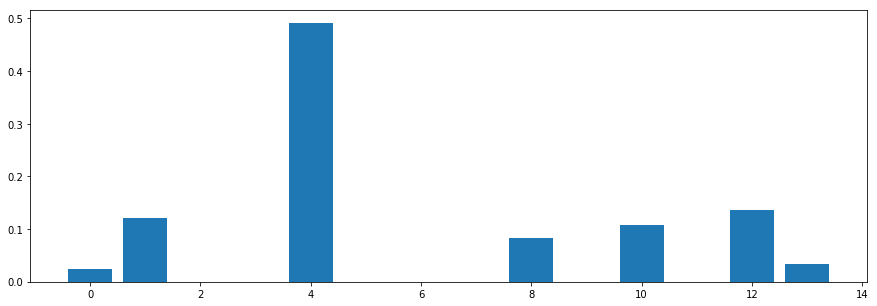

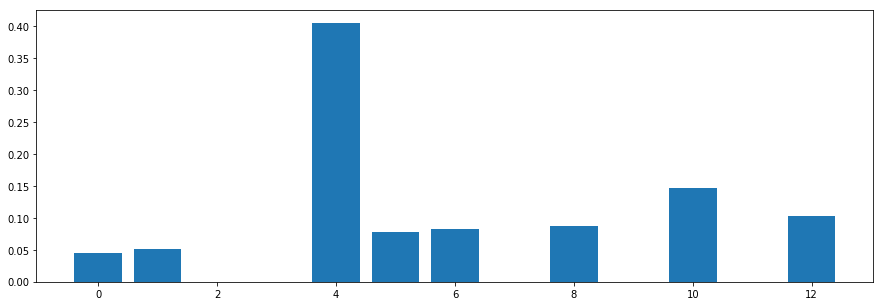

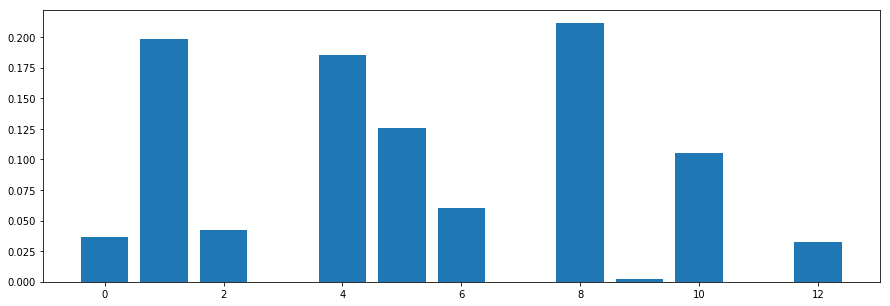

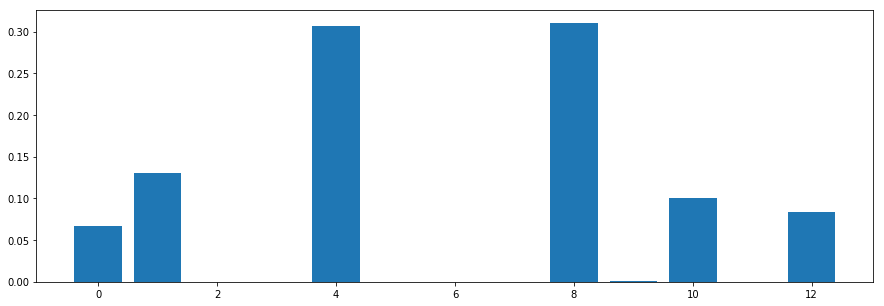

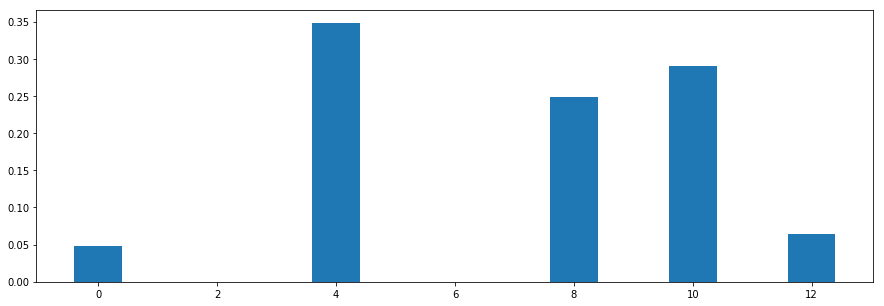

In [141]:
PHASE_PATH = "F:\data\Endoviz2018\Workflow_Challenge\TrainingSet-1\cleaned\phase_annotations"


phase_list = glob(os.path.join(PHASE_PATH, '*.csv'))

for i in range(len(phase_list)):
    phase_data = pd.read_csv(phase_list[i], header=None).values[:,1]

    phases = np.unique(phase_data)
    phase_locs = []
    phase_counts = []
    count = 0
    for phase in phases:
        phase_locs.append(phase_data==phase)
        phase_counts.append(np.sum(phase_locs[count]))
        # print("{0} phase: {1}\n".format(phase, phase_data))
        count += 1

    plt.figure(figsize=(15,5))
    plt.bar(phases, phase_counts/np.sum(phase_counts))

In [142]:
print(phases)

[ 0  4  8  9 10 12]


In [149]:
from prepare_dataset import compress_video

In [159]:
first_element = phase_data[0]
count_all = []
count = 0
phase_list = []
for num in phase_data:
    if num==first_element:
        count+=1
    else:
        count_all.append(count)
        count = 1
        phase_list.append(first_element)
        first_element = num

count_all.append(count)
phase_list.append(first_element)

In [164]:
print(count_all)
print(phase_list)

[4499, 3574, 13342, 21921, 18810, 2312, 6811, 2, 4278, 936, 28220, 7142]
[0, 8, 4, 8, 4, 8, 4, 9, 10, 0, 10, 12]


In [172]:
def sample_with_replacement(array, n_samples):
    return np.random.choice(array, n_samples)

In [173]:
def sample_without_replacement(array, n_samples):
    return np.random.choice(array, n_samples, replace=False)

In [178]:
def compress_phase_data(phase_path, fraction):
    phase_data = pd.read_csv(phase_path, header=None).values[:,1]

    first_element = phase_data[0]
    count_all = []
    count = 0
    for num in phase_data:
        if num==first_element:
            count+=1
        else:
            count_all.append(count)
            count = 1
            first_element = num

    count_all.append(count)
    
    max_phase_count = np.max(count_all)
    max_phase_loc = np.argmax(count_all)
    
    n_selected = int(fraction*max_phase_count)
    
 
    index_all = []
    increment = 0
    for i, count_val in enumerate(count_all):
        index = list(range(count_val))
        
        if count_val>=n_selected:
            selected_index = sample_without_replacement(index, n_selected)
        else:
            selected_index = sample_with_replacement(index, n_selected)
            
        if i>0:
            increment += count_all[i-1]
            index_all.extend([x + increment for x in sorted(selected_index)])
        else:
            index_all.extend(sorted(selected_index))
            
    frame_ids = np.array(list(range(len(index_all))), dtype=np.int)
    phase_data_short = np.vstack((frame_ids, np.array(phase_data[index_all], dtype=np.int))).transpose()
    
    return phase_data_short

In [195]:
PHASE_PATH = "F:\data\Endoviz2018\Workflow_Challenge\TrainingSet-1\cleaned\phase_annotations"

phase_list = glob(os.path.join(PHASE_PATH, '*.csv'))

for phase in phase_list:
    phase_data_short = compress_phase_data(phase, 0.1)
    break

In [196]:
phase_data_short.shape

(136160, 2)

In [197]:
phase_data = pd.read_csv(phase_list[0], header=None).values[:,1]
phase_data.shape

(289322,)

In [198]:
phase_data_short = phase_data_short[:,1]

In [199]:
phases = np.unique(phase_data_short)
print(phases)
print(np.unique(phase_data))

[ 0  1  3  4  5  6  7  8 10 11 12]
[ 0  1  3  4  5  6  7  8 10 11 12]


In [200]:
first_element = phase_data[0]
count_all = []
count = 0
for num in phase_data:
    if num==first_element:
        count+=1
    else:
        count_all.append(count)
        count = 1
        first_element = num

count_all.append(count)
print(count_all)
print(np.sum(count_all))

[10922, 5304, 19883, 11701, 24317, 9858, 2934, 16590, 16089, 5196, 4470, 2120, 2440, 14264, 4796, 3200, 3332, 9769, 2989, 59201, 28672, 29059, 2216]
289322


In [201]:
first_element = phase_data_short[0]
count_all = []
count = 0
for num in phase_data_short:
    if num==first_element:
        count+=1
    else:
        count_all.append(count)
        count = 1
        first_element = num

count_all.append(count)
print(count_all)
print(np.sum(count_all))

[5920, 5920, 5920, 5920, 5920, 5920, 5920, 5920, 5920, 5920, 5920, 5920, 5920, 5920, 5920, 5920, 5920, 5920, 5920, 5920, 5920, 5920, 5920]
136160


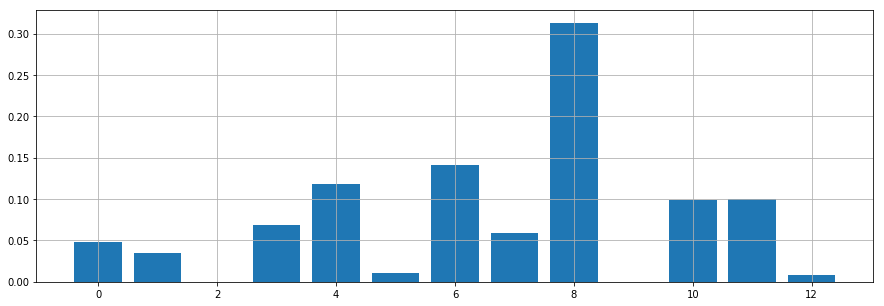

In [207]:
PHASE_PATH = "D:\endovis\sample\phase_annotations"


phase_list = glob(os.path.join(PHASE_PATH, '*.csv'))

for i in range(len(phase_list)):
    phase_data = pd.read_csv(phase_list[i], header=None).values[:,1]

    phases = np.unique(phase_data)
    phase_locs = []
    phase_counts = []
    count = 0
    for phase in phases:
        phase_locs.append(phase_data==phase)
        phase_counts.append(np.sum(phase_locs[count]))
        # print("{0} phase: {1}\n".format(phase, phase_data))
        count += 1

    plt.figure(figsize=(15,5))
    plt.bar(phases, phase_counts/np.sum(phase_counts))
    plt.grid()

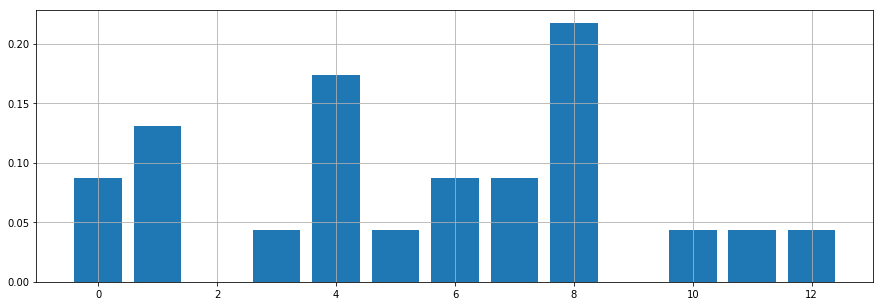

In [206]:
PHASE_PATH = "D:/endovis/compressed/training-1/phase_annotations/"


phase_list = glob(os.path.join(PHASE_PATH, '*.csv'))

for i in range(len(phase_list)):
    phase_data = pd.read_csv(phase_list[i], header=None).values[:,1]

    phases = np.unique(phase_data)
    phase_locs = []
    phase_counts = []
    count = 0
    for phase in phases:
        phase_locs.append(phase_data==phase)
        phase_counts.append(np.sum(phase_locs[count]))
        # print("{0} phase: {1}\n".format(phase, phase_data))
        count += 1

    plt.figure(figsize=(15,5))
    plt.bar(phases, phase_counts/np.sum(phase_counts))
    plt.grid()

In [210]:
PHASE_PATH = "D:/endovis/compressed/training-1/phase_annotations/"


phase_list = glob(os.path.join(PHASE_PATH, '*.csv'))
phase_data = pd.read_csv(phase_list[0], header=None).values[:,1]

first_element = phase_data[0]
count_all = []
count = 0
phase_seq = []
for num in phase_data:
    if num==first_element:
        count+=1
    else:
        count_all.append(count)
        count = 1
        phase_seq.append(first_element)
        first_element = num

count_all.append(count)
phase_seq.append(first_element)

for i in range(len(count_all)):
    print("{0} : {1}".format(phase_seq[i], count_all[i]))
print("\n\n", np.sum(count_all))

0 : 2960
7 : 2960
3 : 2960
7 : 2960
6 : 2960
4 : 2960
5 : 2960
6 : 2960
4 : 2960
8 : 2960
1 : 2960
8 : 2960
1 : 2960
8 : 2960
4 : 2960
1 : 2960
4 : 2960
8 : 2960
0 : 2960
8 : 2960
10 : 2960
11 : 2960
12 : 2960


 68080


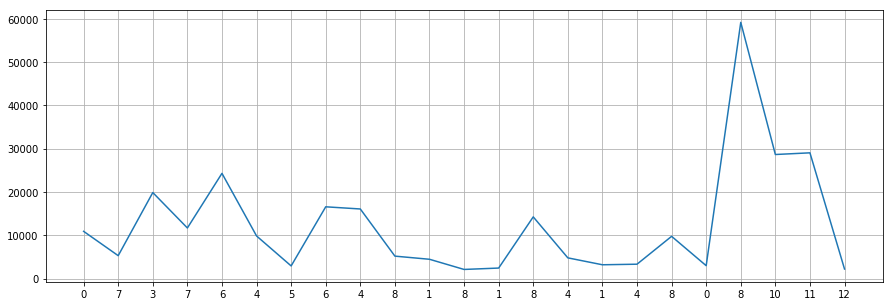

In [217]:
PHASE_PATH = "D:/endovis/sample/phase_annotations/"


phase_list = glob(os.path.join(PHASE_PATH, '*.csv'))
phase_data = pd.read_csv(phase_list[0], header=None).values[:,1]

first_element = phase_data[0]
count_all = []
count = 0
phase_seq = []
for num in phase_data:
    if num==first_element:
        count+=1
    else:
        count_all.append(count)
        count = 1
        phase_seq.append(str(first_element))
        first_element = num

count_all.append(count)
phase_seq.append(first_element)

# for i in range(len(count_all)):
#     print("{0} : {1}".format(phase_seq[i], count_all[i]))
# print("\n\n", np.sum(count_all))

plt.figure(figsize=(15,5))
plt.plot(list(range(len(phase_seq))), count_all)
plt.xticks(list(range(len(phase_seq))), phase_seq)
plt.grid()


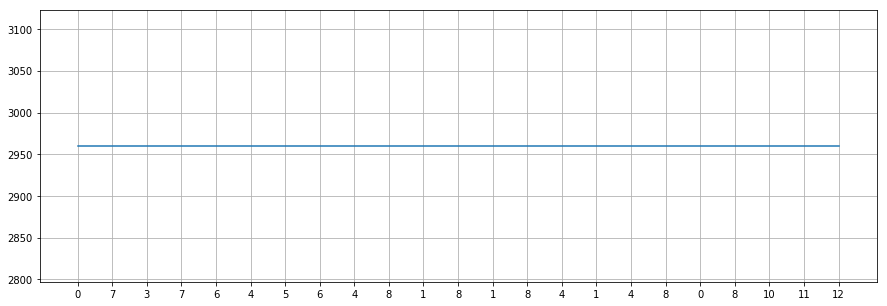

In [218]:
PHASE_PATH = "D:/endovis/compressed/training-1/phase_annotations/"


phase_list = glob(os.path.join(PHASE_PATH, '*.csv'))
phase_data = pd.read_csv(phase_list[0], header=None).values[:,1]

first_element = phase_data[0]
count_all = []
count = 0
phase_seq = []
for num in phase_data:
    if num==first_element:
        count+=1
    else:
        count_all.append(count)
        count = 1
        phase_seq.append(str(first_element))
        first_element = num

count_all.append(count)
phase_seq.append(first_element)

# for i in range(len(count_all)):
#     print("{0} : {1}".format(phase_seq[i], count_all[i]))
# print("\n\n", np.sum(count_all))

plt.figure(figsize=(15,5))
plt.plot(list(range(len(phase_seq))), count_all)
plt.xticks(list(range(len(phase_seq))), phase_seq)
plt.grid()
